#Adversarial Search:
---
This program will:
> 1. Print a brief (1-3 lines) message explaining the purpose of this app.<br>
> 2. Display the board.See screenshot below for ideas.<br>
> 3. Prompt the user to play (as `X`) by indicating numerically where they want to place their `X` on the board.<br>
> 4. Play (as `O`) the computer's move.<br>
> 5. Repeat steps 3 and 4 until there is either a winner or the game ends in a tie.<br>
> 6. Ask if the user wants to play another round or quit.<br>

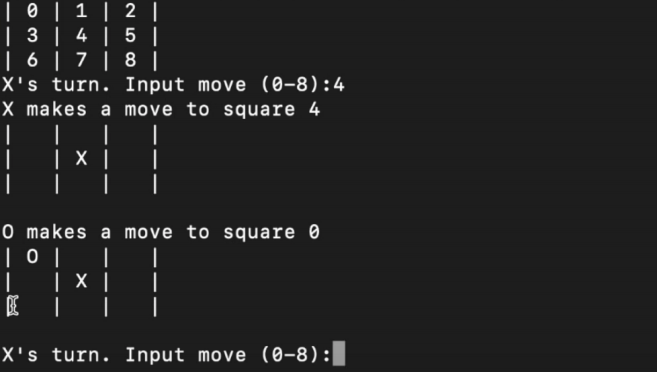

## Code

In [ ]:
import time

board = [[[], [], []],
         [[], [], []],
         [[], [], []]]

example_board = 'Positions:\n| 1 | 2 | 3 |\n| 4 | 5 | 6 |\n| 7 | 8 | 9 |'

board_string = '\nCurrent Board: '
input_string = 'Please make your move(1-9): '
tie_string = 'It is a tie!'
error_string = 'Error, please try again.'


def print_board():
    print(board_string)
    for row in board:  #for each row 
        print("|", end='')  #print a left edge 
        for item in range(0, 3):  #for each item in the row print the item and a right edge 
            print(' ' + str(row[item] if row[item] else ' ') + ' |', end='')  
        print()  #print a new line at the end of the board 


def print_end():
    print_board()  #print the final board 
    print(tie_string if check() == 'tie' else f'The winner is {check()}!')
    for i in range(0, 9):  #for all spaces on the board 
        if board[i // 3][i % 3]:  #if the space is not empty 
            board[i // 3][i % 3] = []  #set the space to empty  

def check():
    for x in range(0, 3):  #check if any of the rows or diagonals have a winner 
        if board[x][0] and (board[x][0] == board[x][1] == board[x][2] or board[x][0] == board[1][1] == board[2 - x][2]):
            return board[x][0]  #if there is a match, return the winner 
    for y in range(0, 3):  #check if any of the columns has a winner 
        if board[0][y] == board[1][y] == board[2][y] and board[0][y]:
            return board[0][y]  #if there is a match, return the winner 
    for z in range(0, 9):  #for all spaces on the board 
        if not board[z // 3][z % 3]:  #check if there are still potential moves 
            return False  #if there are no winners and the game can go on, return False 
    return 'tie'  #if there are no more moves left, return a tie  


def minimax(player='O', v=None, x=None):
    result = check()  #check if the game is over 
    if result:  #if the game is over return the result of the game 
        return (3, 0) if result == 'O' else (2, 0) if result == 'tie' else (1, 0)

    for i in range(0, 9):  #for all spaces on the board 
        if not board[i // 3][i % 3]:  #if the space is empty 
            board[i // 3][i % 3] = player  #set the space to the current player 
            if player == 'O':  #if player O's turn, find the best move for O 
                m, z = minimax('X')  #that minimizes X's chance to win 
                if not x or m > v:  #if its the best move so far 
                    v, x = m, i  #set v and x to m and i, respectively
            else:  #if player X's turn, find the best move for X 
                m, z = minimax('O')  #that minimizes O's chance to win 
                if not x or m < v:  #if its the best move so far 
                    v, x = m, i  #set v and x to m and i, respectively
            board[i // 3][i % 3] = []  #revert back the board to its previous state 
    return v, x  #return the best score and the best move 


def minimax_alpha_beta(player='O', alpha=None, beta=None, v=None, x=None):
    result = check()  #check if the game is over 
    if result:  #if the game is over return the result of the game 
        return (3, 0) if result == 'O' else (2, 0) if result == 'tie' else (1, 0)

    for i in range(0, 9):  #for all spaces on the board 
        if not board[i // 3][i % 3]:  #if the space is empty 
            board[i // 3][i % 3] = player  #set the space to the current player 
            if player == 'O':  #if player O's turn, find the best move for O
                m = minimax_alpha_beta('X', alpha, beta)[0]  #that minimizes X's chance to win  
                board[i // 3][i % 3] = []  #revert back the board to its previous state
                if not v or m > v:  #if its the best move so far, 
                    v, x = m, i  #set v and x to m and i, respectively
                if beta and v >= beta:  #if its as good or better than the best move,  
                    return v, x  #return the move 
                if not alpha or v > alpha:  #if its not the best move, 
                    alpha = v  #set it as the alpha bar
            else:  #if player X's turn, find the best move for X
                m = minimax_alpha_beta('O', alpha, beta)[0]  #that minimizes O's chance to win 
                board[i // 3][i % 3] = []  #revert back the board to its previous state
                if not v or m < v:  #if its the best move so far, 
                    v, x = m, i  #set v and x to m and i, respectively
                if alpha and v <= alpha:  #if its as good or better than the best move,  
                    return v, x  #return the move 
                if not beta or v < beta:  #if its not the best move, 
                    beta = v  #set it as the beta bar
    return v, x  #return the best move


def play():
    print(example_board)
    while not check():  #while the game isn't over 
        print_board()  #print the current board 
        while not move(int(input(input_string)) - 1, 'X'):  #ask user for a move 
            print(error_string)  #if move is not valid print error 
        start = time.time()  #start time for minimax 
        minimax()  #run minimax 
        print(f'Time with minimax: {round(time.time() - start, 8)}s')
        start = time.time()  #start time for minimax w/o alpha-beta pruning 
        move(minimax_alpha_beta()[1], 'O')  #run minimax w/ alpha-beta pruning 
        print(f'Time with minimax with alpha-beta pruning: {round(time.time() - start, 8)}s')
    print_end()  #print the results  


def move(user_input, player):
    if 0 <= user_input <= 8 and not board[user_input // 3][user_input % 3]:  #if move is valid, 
        board[user_input // 3][user_input % 3] = player  #add to the board
        return True


def main():
    play()  #run the game 
    if (input('Would you like to play again (Y/N)? ') == 'Y'):  #while the user selects Y,
        main()  #continue to play 
    

Run Code:

In [ ]:
main()